In [58]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os 
import re
import spacy 
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

In [59]:
col = ["File_Name","Auteur", "Texte"]
df= pd.DataFrame(columns=col)
print(df)

Empty DataFrame
Columns: [File_Name, Auteur, Texte]
Index: []


In [60]:
chemin= os.getcwd() + '\\training_data\\'
chemin=str(chemin)


In [61]:
datas=[]
file_dir=[]
file_name=[]

for file in os.listdir(chemin):
    file_name.append(file)
    file_dir= chemin+str(file)
    with open(file_dir, 'r') as f:
        data = f.read()
        datas.append(data)
        f.close()
print(datas)
print(file_name)
df=pd.DataFrame({"Texte":[], "File_Name":[]})


['Idris was well content with this resolve of mine.\n', 'I was faint, even fainter than the hateful modernity of that accursed city had made me.\n', 'Above all, I burn to know the incidents of your own passage through the dark Valley and Shadow.\n', 'He might see, perhaps, one or two points with unusual clearness, but in so doing he, necessarily, lost sight of the matter as a whole.\n', 'All obeyed the Lord Protector of dying England; all looked up to him.\n', 'It was difficult, at any given time, to say with certainty upon which of its two stories one happened to be.\n', 'Now, it cannot be maintained, even, that by the crawling system the greatest amount of truth would be attained in any long series of ages, for the repression of imagination was an evil not to be compensated for by any superior certainty in the ancient modes of investigation.\n', 'Alien it indeed was to all art and literature which sane and balanced readers know, but we recognised it as the thing hinted of in the forb

In [62]:
df["Texte"]=datas
df["File_Name"]=file_name
print(df)


                                                  Texte           File_Name
0     Idris was well content with this resolve of mi...  doc_id00001MWS.txt
1     I was faint, even fainter than the hateful mod...  doc_id00002HPL.txt
2     Above all, I burn to know the incidents of you...  doc_id00003EAP.txt
3     He might see, perhaps, one or two points with ...  doc_id00004EAP.txt
4     All obeyed the Lord Protector of dying England...  doc_id00005MWS.txt
...                                                 ...                 ...
3595  My countenance was painted with the hues of il...  doc_id05087MWS.txt
3596  It must have been merely the association of an...  doc_id05088HPL.txt
3597  Dangers he met unflinchingly; crimes he commit...  doc_id05089HPL.txt
3598  As this state of wretchedness became more conf...  doc_id05090MWS.txt
3599  Were the pride of ancestry, the patrician spir...  doc_id05092MWS.txt

[3600 rows x 2 columns]


In [63]:
pattern= "[A-Z]{3}[.]+txt$"
search = []    
for values in df["File_Name"]:
    search.append(re.search(r'[A-Z]{3}', values).group())
df['Auteur'] = search


In [64]:
#Modèle entrainé le plus léger et suffisant ici. Regarder si md ou lrg à meilleur ratio time_process/accurancy
nlp = spacy.load("en_core_web_sm")


In [65]:
#Code plus efficient afin de tokeniser, lemmatiser et rajouter les POS. 
# Ne pas oublier de rajouter les stopwords!!!!!
tokens = []
lemma = []
pos = []
stop_words= []
ent= []

for doc in nlp.pipe(df['Texte'].astype('unicode').values, batch_size=50, n_threads=3):
    if doc.is_parsed:
        tokens.append([n.text for n in doc])
        lemma.append([n.lemma_ for n in doc])
        pos.append([n.pos_ for n in doc])
        stop_words.append([n.text for n in doc if not n.is_stop])
        ent.append([e.label_ for e in doc.ents])

    else:
        # Ajouter des blancs si erreur pour avoir le même nombre d'entrées
        lemma.append(None)
        pos.append(None)
        stop_words.append(None)
        ent.append(None)

df['Tokens'] = tokens
df['Tokens_NoStopW']= stop_words
df['lemma'] = lemma
df['PartOfSpeech'] = pos
df['ent'] = ent

DEBUT DE L'EXPLORATION

In [66]:
auteur = df.groupby("Auteur")
auteur.describe().head()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1652, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'
Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1652, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'
Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1652, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'
Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1652, in pandas._libs.hashtable.PyObjectHas

TypeError: unhashable type: 'list'

TypeError: unhashable type: 'list'

TypeError: unhashable type: 'list'

TypeError: unhashable type: 'list'

TypeError: unhashable type: 'list'

TypeError: unhashable type: 'list'

TypeError: unhashable type: 'list'

TypeError: unhashable type: 'list'

TypeError: unhashable type: 'list'

TypeError: unhashable type: 'list'

TypeError: unhashable type: 'list'

TypeError: unhashable type: 'list'

TypeError: unhashable type: 'list'

TypeError: unhashable type: 'list'

Texte                                                                 \
       count unique                                                top freq   
Auteur                                                                        
EAP     1432   1432  But these and other difficulties attending res...    1   
HPL     1024   1024  Gilman tried to stop up the rat hole every day...    1   
MWS     1144   1144  Idris stood beside me, her dear hand locked in...    1   

       File_Name                                 Tokens         ...  \
           count unique                 top freq  count unique  ...   
Auteur                                                          ...   
EAP         1432   1432  doc_id04630EAP.txt    1   1432   1432  ...   
HPL         1024   1024  doc_id03019HPL.txt    1   1024   1024  ...   
MWS         1144   1144  doc_id00291MWS.txt    1   1144   1144  ...   

                                                    lemma      PartOfSpeech  \
                                                      top freq        count   
Auteur                                                                        
EAP     [as, the, evening, wear, away, -PRON-, become,...    1         1432   
HPL     [if, this, man, could, not, be, restore, to, l...    1         1024   
MWS     [-PRON-, believe, that, without, the, slight, ...    1         1144   

                                                                        ent  \
       unique                                                top freq count   
Auteur                                                                        
EAP      1421          [DET, ADJ, NOUN, AUX, VERB, PUNCT, SPACE]    3  1432   
HPL      1024  [SCONJ, DET, NOUN, VERB, PART, AUX, VERB, ADP,...    1  1024   
MWS      1144  [PRON, VERB, SCONJ, ADP, DET, ADJ, NOUN, ADP, ...    1  1144   

                        
       unique top freq  
Auteur                  
EAP       182  []  820  
HPL       183  []  488  
MWS       138  []  643  

[3 rows x 28 columns]

Word Clouds pour les mots sans les stopWords

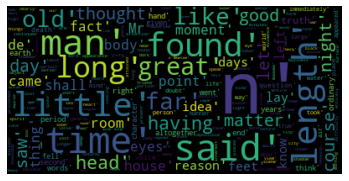

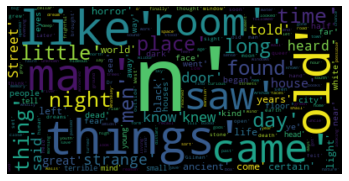

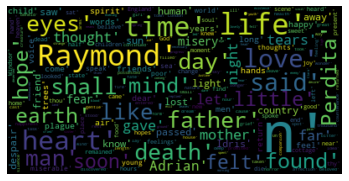

In [67]:
texte_HPL= []
texte_EAP=[]
texte_MWS=[]
for i, row in df.iterrows():
    if row["Auteur"]=='EAP':
        texte_EAP.append(row["Tokens_NoStopW"])
    if row["Auteur"]=='HPL':
        texte_HPL.append(row["Tokens_NoStopW"])
    if row["Auteur"]=='MWS':
        texte_MWS.append(row["Tokens_NoStopW"])
texte_EAP= ''.join(str(v) for v in texte_EAP)
texte_HPL=''.join(str(v) for v in texte_HPL)
texte_MWS=''.join(str(v) for v in texte_MWS)

wordcloud_texte_EAP = WordCloud().generate(texte_EAP)
plt.imshow(wordcloud_texte_EAP, interpolation='bilinear')
plt.axis("off")
plt.show()

wordcloud_texte_HPL = WordCloud().generate(texte_HPL)
plt.imshow(wordcloud_texte_HPL, interpolation='bilinear')
plt.axis("off")
plt.show()

wordcloud_texte_MWS = WordCloud().generate(texte_MWS)
plt.imshow(wordcloud_texte_MWS, interpolation='bilinear')
plt.axis("off")
plt.show()

Word Clouds pour les POS par auteur pour voir si pattern ressort

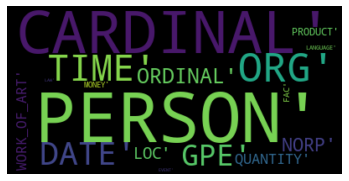

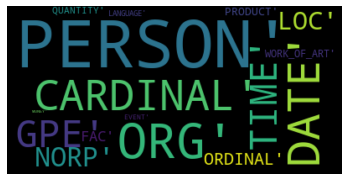

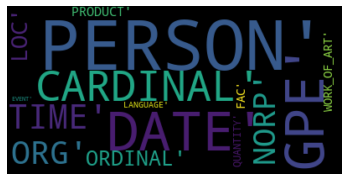

In [68]:
ENT_HPL= []
ENT_EAP=[]
ENT_MWS=[]
for i, row in df.iterrows():
    if row["Auteur"]=='EAP':
        ENT_EAP.append(row["ent"])
    if row["Auteur"]=='HPL':
        ENT_HPL.append(row["ent"])
    if row["Auteur"]=='MWS':
        ENT_MWS.append(row["ent"])
ENT_EAP= ''.join(str(v) for v in ENT_EAP)
ENT_HPL=''.join(str(v) for v in ENT_HPL)
ENT_MWS=''.join(str(v) for v in ENT_MWS)

wordcloud_ENT_EAP = WordCloud().generate(ENT_EAP)
plt.imshow(wordcloud_ENT_EAP, interpolation='bilinear')
plt.axis("off")
plt.show()

wordcloud_ENT_HPL = WordCloud().generate(ENT_HPL)
plt.imshow(wordcloud_ENT_HPL, interpolation='bilinear')
plt.axis("off")
plt.show()

wordcloud_ENT_MWS = WordCloud().generate(ENT_MWS)
plt.imshow(wordcloud_ENT_MWS, interpolation='bilinear')
plt.axis("off")
plt.show()

Comptage des occurences des mots :

In [69]:
df['clean_text']=str()
for i, row in df.iterrows():
    row['clean_text']=' '.join(row['lemma'])
    

In [70]:
'''
df['clean_text'] = df.clean_text.str.replace("-PRON-", " ")
df['clean_text'] = df.clean_text.str.replace("re.", " ")
df['clean_text'] = df.clean_text.str.replace(", ", " ")
df['clean_text'] = df.clean_text.str.replace("  ", " ")
df['clean_text'] = df.clean_text.str.replace(" ; ", " ")
df['clean_text'] = df.clean_text.str.replace("\" ", " ")
'''

'\ndf[\'clean_text\'] = df.clean_text.str.replace("-PRON-", " ")\ndf[\'clean_text\'] = df.clean_text.str.replace("re.", " ")\ndf[\'clean_text\'] = df.clean_text.str.replace(", ", " ")\ndf[\'clean_text\'] = df.clean_text.str.replace("  ", " ")\ndf[\'clean_text\'] = df.clean_text.str.replace(" ; ", " ")\ndf[\'clean_text\'] = df.clean_text.str.replace("" ", " ")\n'

In [71]:
df['clean_text'] = df.clean_text.replace("[PRON\s\W]", " ",regex=True)
df['clean_text'] = df.clean_text.replace(' +',' ',regex=True)
df['clean_text'] = df.clean_text.replace('^ ','',regex=True)

#df = pd.get_dummies(df, columns=['Auteur'])
df['Auteur_number']=df['Auteur'].map({'EAP': 1, 'HPL':2, 'MWS':3})


In [72]:
df_finale=df[['Auteur_number','clean_text','ent']]



In [73]:
'''
import multiprocessing
from gensim.models import Word2Vec
from gensim.models.phrases import Phrases, Phraser
from collections import defaultdict

cores = multiprocessing.cpu_count()
w2v_model = Word2Vec()

sent = [row.split() for row in df_finale['clean_text']]
phrases = Phrases(sent, min_count=30, progress_per=10000)
bigram = Phraser(phrases)
sentences = bigram[sent]
w2v_model.build_vocab(sentences)
w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)



w2v_model['be']



word_freq = defaultdict(int)
for sent in sentences:
    for i in sent:
        word_freq[i] += 1
len(word_freq)



sorted(word_freq, key=word_freq.get, reverse=True)[:10]



w2v_model.init_sims(replace=True)
w2v_model.wv.most_similar(positive=["EAP"])
w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)





y = df[['Auteur_number']]
X=df_finale.drop(['Auteur_number'], axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)




from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(df_finale.clean_text)
X_train_counts.shape



from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_counts, df_finale.Auteur_number)



from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline

text_clf_svm = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),('clf-svm', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42)),])
text_clf_svm.fit(df_finale.clean_text, df_finale.Auteur_number)
predicted_svm = text_clf_svm.predict(df_finale.clean_text)
np.mean(predicted_svm == df_finale.Auteur_number)
'''

'\nimport multiprocessing\nfrom gensim.models import Word2Vec\nfrom gensim.models.phrases import Phrases, Phraser\nfrom collections import defaultdict\n\ncores = multiprocessing.cpu_count()\nw2v_model = Word2Vec()\n\nsent = [row.split() for row in df_finale[\'clean_text\']]\nphrases = Phrases(sent, min_count=30, progress_per=10000)\nbigram = Phraser(phrases)\nsentences = bigram[sent]\nw2v_model.build_vocab(sentences)\nw2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)\n\n\n\nw2v_model[\'be\']\n\n\n\nword_freq = defaultdict(int)\nfor sent in sentences:\n    for i in sent:\n        word_freq[i] += 1\nlen(word_freq)\n\n\n\nsorted(word_freq, key=word_freq.get, reverse=True)[:10]\n\n\n\nw2v_model.init_sims(replace=True)\nw2v_model.wv.most_similar(positive=["EAP"])\nw2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)\n\n\n\n\n\ny = df[[\'Auteur_number\']]\nX=df_finale.drop([\'Auteur_number\'], axis=1)\nfrom sk

In [74]:
y = df['Auteur_number']
#X=df_finale.drop(['Auteur_number'], axis=1)
X= df['clean_text']
print(X)
print(y)

0             Idris be well content with this resolve of 
1       be faint even fainter than the hateful moderni...
2       above all burn to know the incident of own pas...
3       may see perhaps one or two point with unusual ...
4       all obey the Lord rotector of die England all ...
                              ...                        
3595    countenance be paint with the hue of ill healt...
3596    must have be merely the association of any odd...
3597      danger meet unflinchingly crime commit unmoved 
3598    as this state of wretchedness become more conf...
3599    be the pride of ancestry the patrician spirit ...
Name: clean_text, Length: 3600, dtype: object
0       3
1       2
2       1
3       1
4       3
       ..
3595    3
3596    2
3597    2
3598    3
3599    3
Name: Auteur_number, Length: 3600, dtype: int64


In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

nb = Pipeline([('vect', CountVectorizer()),('clf', MultinomialNB())])
nb.fit(X_train, y_train)

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
y_pred = nb.predict(X_test)

auteurs=['EAP','HPL', 'MWS']
print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=auteurs))

accuracy 0.7592592592592593
              precision    recall  f1-score   support

         EAP       0.73      0.82      0.77       424
         HPL       0.84      0.65      0.73       328
         MWS       0.74      0.79      0.76       328

    accuracy                           0.76      1080
   macro avg       0.77      0.75      0.76      1080
weighted avg       0.77      0.76      0.76      1080



In [76]:
#CrossValidation
from sklearn.model_selection import cross_val_score

scores = cross_val_score(nb, X_test, y_test, cv=10)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.72222222 0.7037037  0.72222222 0.71296296 0.7037037  0.67592593
 0.73148148 0.66666667 0.72222222 0.68518519]
Accuracy: 0.70 (+/- 0.04)
